<a href="https://colab.research.google.com/github/nileshgarg12/SHALA2020-/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
# Loading the basic packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the machine learning packages
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
data = pd.read_csv(data_url)


In [55]:
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
#drooping employee count column
#data.hist(bins=15,figsize=(18, 20))
data = data.drop(['EmployeeCount'], axis = 1)


In [0]:

data = data.drop(['EmployeeNumber','JobLevel',
                  'TotalWorkingYears','ID',
                  'PerformanceRating','YearsAtCompany',
                  'YearsSinceLastPromotion',
                  'YearsInCurrentRole',
                  'YearsWithCurrManager'], axis = 1)



In [58]:
#### feature normalization for numerical column

data.info()
#print(data.isnull().sum())
from sklearn import preprocessing 
col_index = [0,3,5,6,8,10,11,13,15,16,17,19,20,21,22,23]
x = data.iloc[:,col_index].values 

Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
#print ("\nAfter Standardisation : \n", x_after_Standardisation)
a=data.columns
b = a[(col_index)]
b
data[(b)] = x_after_Standardisation
#data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EnvironmentSatisfaction   1028 non-null   int64 
 9   Gender                    1028 non-null   object
 10  HourlyRate                1028 non-null   int64 
 11  JobInvolvement            1028 non-null   int64 
 12  JobRole                   1028 non-null   object
 13  JobSatisfaction           1028 non-null   int64 
 14  MaritalStatus           

In [0]:
##### feature normalization for categorical variable
BusinessTravel = pd.get_dummies(data.BusinessTravel)
Department = pd.get_dummies(data.Department)
EducationField = pd.get_dummies(data.EducationField)
Gender = pd.get_dummies(data.Gender)
JobRole = pd.get_dummies(data.JobRole)
MaritalStatus = pd.get_dummies(data.MaritalStatus)
OverTime = pd.get_dummies(data.OverTime)
data_new = pd.concat([BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime],axis=1)
col_index = [2,4,7,9,12,14,18]
a=data.columns
b = a[(col_index)]
data = data.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis = 1)


In [0]:

frames = [data ,data_new]
data_preprocessed = pd.concat(frames,axis=1)
data_preprocessed
y = data_preprocessed['Attrition']
X = data_preprocessed.drop(['Attrition','Human Resources'], axis = 1)
#duplicate_columns = X.columns[X.columns.duplicated()]
#duplicate_columns



In [61]:
#splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=1123)
y_train.shape

(668,)

In [62]:
### accuracy for training set
xgb_clf = xgb.XGBClassifier(learning_rate=0.2)
xgb_clf.fit(X_train, y_train)

predictions_train = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions_train)
print(np.round(accuracy*100, 2), '%')

99.25 %


In [63]:
# Applying classifier on test (unseen) set
predictions_test = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions_test)
print(np.round(accuracy*100, 2), '%')

86.11 %


In [64]:
a = confusion_matrix(y_test, predictions_test)
print(confusion_matrix(y_test, predictions_test))
print("="*60)
print(classification_report(y_test, predictions_test))


[[291   7]
 [ 43  19]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       298
           1       0.73      0.31      0.43        62

    accuracy                           0.86       360
   macro avg       0.80      0.64      0.68       360
weighted avg       0.85      0.86      0.84       360



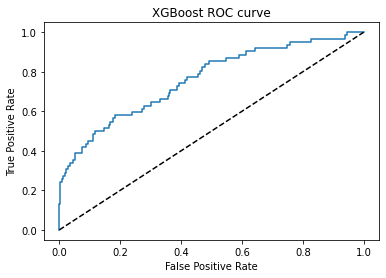

In [65]:
##### plotting ROC curve  ######

from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [14]:
xgb_clf.feature_importances_

array([0.04159824, 0.02457125, 0.03044249, 0.01783609, 0.03960239,
       0.02030614, 0.03990437, 0.03156724, 0.03682756, 0.02037921,
       0.02337741, 0.01251208, 0.01846835, 0.04323235, 0.01956765,
       0.0298104 , 0.02816848, 0.03492077, 0.01768304, 0.02182539,
       0.03705489, 0.04185058, 0.01990098, 0.03098194, 0.        ,
       0.00730758, 0.01953313, 0.        , 0.01755159, 0.02976289,
       0.0195271 , 0.0194765 , 0.01874032, 0.04942399, 0.01466676,
       0.        , 0.02645   , 0.02593361, 0.01597386, 0.05326336,
       0.        ], dtype=float32)

In [66]:
###### Random Forest Classifier #####
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.89, 0.91, 0.96, 0.95, 0.96, 0.98, 0.99, 1.0]
The testing scores were: [0.74, 0.83, 0.82, 0.83, 0.84, 0.83, 0.85, 0.85]


In [32]:
########## Accuracy for training set #######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=1123)
accuracy = accuracy_score(y_train, train_predictions)
print(np.round(accuracy*100, 2), '%')


99.7 %


In [33]:
############ Accuracy for test set #########
accuracy = accuracy_score(y_test, test_predictions)
print(np.round(accuracy*100, 2), '%')


85.0 %


In [67]:
print(confusion_matrix(y_test, test_predictions))
print("="*60)
print(classification_report(y_test, test_predictions))

[[298   0]
 [ 54   8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       298
           1       1.00      0.13      0.23        62

    accuracy                           0.85       360
   macro avg       0.92      0.56      0.57       360
weighted avg       0.87      0.85      0.80       360



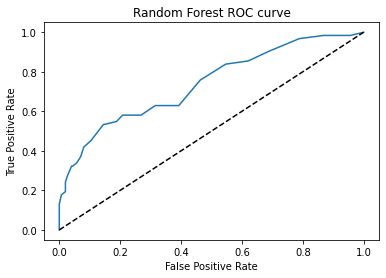

In [76]:
##### ROC Curve #######
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
# show the plot
plt.show()

In [68]:
###### DecisionTreeClassifier #######

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=1123)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1123, splitter='best')

In [69]:
### accuracy for training set
dtc.fit(X_train,y_train)
train_pred = dtc.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(np.round(accuracy*100, 2), '%')


100.0 %


In [70]:
###### accuracy for test set ######
test_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print(np.round(accuracy*100, 2), '%')

80.28 %


In [71]:
print(confusion_matrix(y_test, test_pred))
print("="*60)
print(classification_report(y_test, test_pred))

[[263  35]
 [ 36  26]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       298
           1       0.43      0.42      0.42        62

    accuracy                           0.80       360
   macro avg       0.65      0.65      0.65       360
weighted avg       0.80      0.80      0.80       360



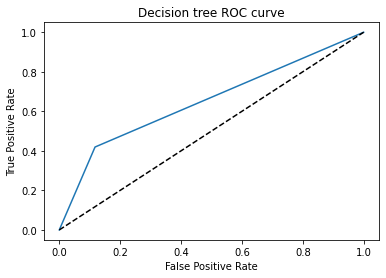

In [77]:
##### ROC Curve #######
from sklearn.metrics import roc_curve  
probs = dtc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC curve')
# show the plot
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier 
knc = KNeighborsClassifier(weights='distance')
knc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [73]:
####### Accuracy for training set ########
knc.fit(X_train,y_train)
train_pred = knc.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(np.round(accuracy*100, 2), '%')

100.0 %


In [74]:
###### accuracy for test set ######
test_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print(np.round(accuracy*100, 2), '%')

80.28 %


In [75]:
print(confusion_matrix(y_test, test_pred))
print("="*60)
print(classification_report(y_test, test_pred))

[[263  35]
 [ 36  26]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       298
           1       0.43      0.42      0.42        62

    accuracy                           0.80       360
   macro avg       0.65      0.65      0.65       360
weighted avg       0.80      0.80      0.80       360



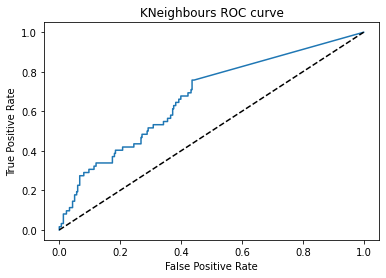

In [78]:
##### ROC Curve #######
from sklearn.metrics import roc_curve  
probs = knc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbours ROC curve')
# show the plot
plt.show()

In [0]:
########### Result ###########
# xgb boost has F1-score = 0.92 and test accuracy = 86%
# Random Forest has F1-score = 0.92 and test accuracy = 85%
# decision tree has F1-score = 0.88 and test accuracy = 80%
# KNeighbours has F1-score = 0.88 and test accuracy = 80%


#### so among all XGB Boost was best classifier